<a href="https://colab.research.google.com/github/kishon45229/Customer-Churn-Prediction-in-Telecom-Industry/blob/main/Mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mini Project - Customer Churn Prediction in Telecom Industry**
IT41033 - Nature-Inspired Algorithms\
Faculty of Information Technology\
Horizon Campus

**Group Members**

N. Abisha – ITBIN-2110-0074\
G. Kishon – ITBIN-2110-0054\
T. F. Fathima – ITBIN-2110-0031\
H. M. F. Asma – ITBIN-2110-0013\
F. Mulhima – ITBIN-2110-0063

**Background**

Customer retention is critical for service providers. Predicting churn
allows companies to take proactive steps to retain customers, which
can lead to significant savings and increased profitability. Churn
prediction helps in identifying customers at risk, enabling service
providers to improve customer satisfaction and loyalty.


**Objective**

Identifying customers who are likely to leave a service provider.

# **Import Necessary Librarires**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# **Add Dataset**

As a first step, the below code `pd.read_csv()` reads a CSV file into a pandas DataFrame.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Nature Inspired Algorithms/Mini Project/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Next, we wanted to know how many rows and columns this dataset contains. Therefore, we used `df.shape`.

In [ ]:
df.shape

(7043, 21)

# **Statistics**

Let's calculate basic summarization statistics. For that we used `describe() `method.

In [ ]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


The output shows the overall total number of rows(counts), unique values and its frequency, mean, standard deviation, percentage of data, minimum and maximum values.

# **Remove Incorrect/Incomplete/Duplicate Data**

To get a quick summary of the DataFrame, we used `df.info()`.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Based on the output of `df.info()`, we figured out that column `TotalCharges` contains numeric values. However it was considered as text values. Therefore, we have to convert those values to numeric using `pd.to_numeric(df['TotalCharges'], errors='coerce')`.

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Now you can see Data type of `TotalCharges` is changed to `float64`.

As a next step, we need to check if the dataset contains any null values or not. For this, we used `df.isnull().sum()`

In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


Based on the output, you can see that only the `TotalCharges` column contains 11 null values. All other columns have zero null values. To resolve this, there are several options. One is to calculate the mean value for the `TotalCharges` column and substitute this value for the null values. The other option is to remove the 11 rows from the dataset.

We chose the second option because this dataset contains 7043 rows. Dropping 11 rows does not affect the overall dataset accuracy. Therefore, to remove those null value containing rows, we used the code `df.dropna(subset=['TotalCharges'])`.





In [ ]:
df = df.dropna(subset=['TotalCharges'])
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


Now you can see there is no columns contains a null value.  Therefore, no need to handle missing values.

Additionaly to confirm the rows are removed or not, we used `df.shape`. This time the row count should be reduced by 11 from 7043.

In [ ]:
df.shape

(7032, 21)

Nou you can see the current row count 7032. Therefore the null value rows are successfullly removed from the dataset.


Next we checked is there is any duplicate values in the dataset. For that we used `duplicated()` method.

In [ ]:
df.duplicated().sum()

0

The output is 0. That means there is no duplicate data.

In [ ]:
df.to_csv('Section 1 finished dataset.csv', index=False)

# **Visualize the Data**

We will create histograms, box plots, and a correlation heatmap to visualize the data.



1.   **Histogram**



We visualized the numerical data using histogram.

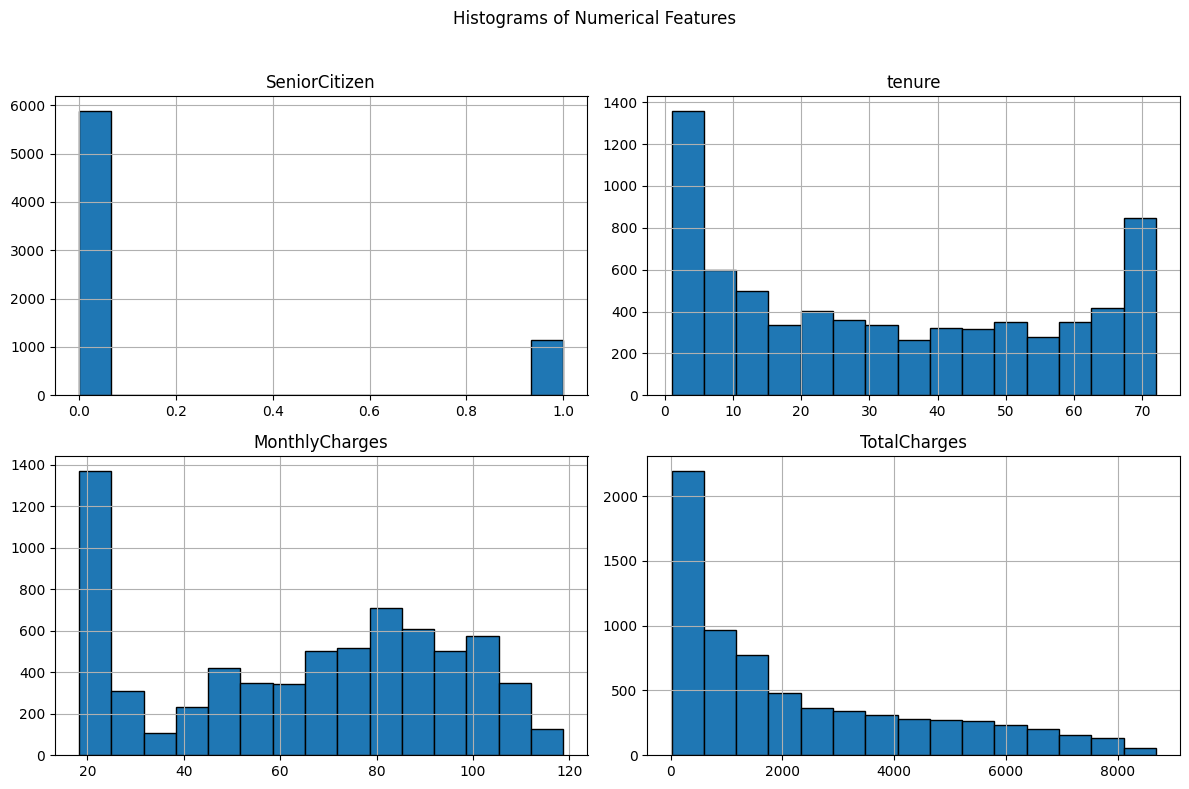

In [ ]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_features].hist(figsize=(12, 8), bins=15, edgecolor='black')
plt.suptitle('Histograms of Numerical Features')
plt.tight_layout(rect=[0, 0, 1, 0.96])

2. Box plot

We visualized the numerical data in the box plot.

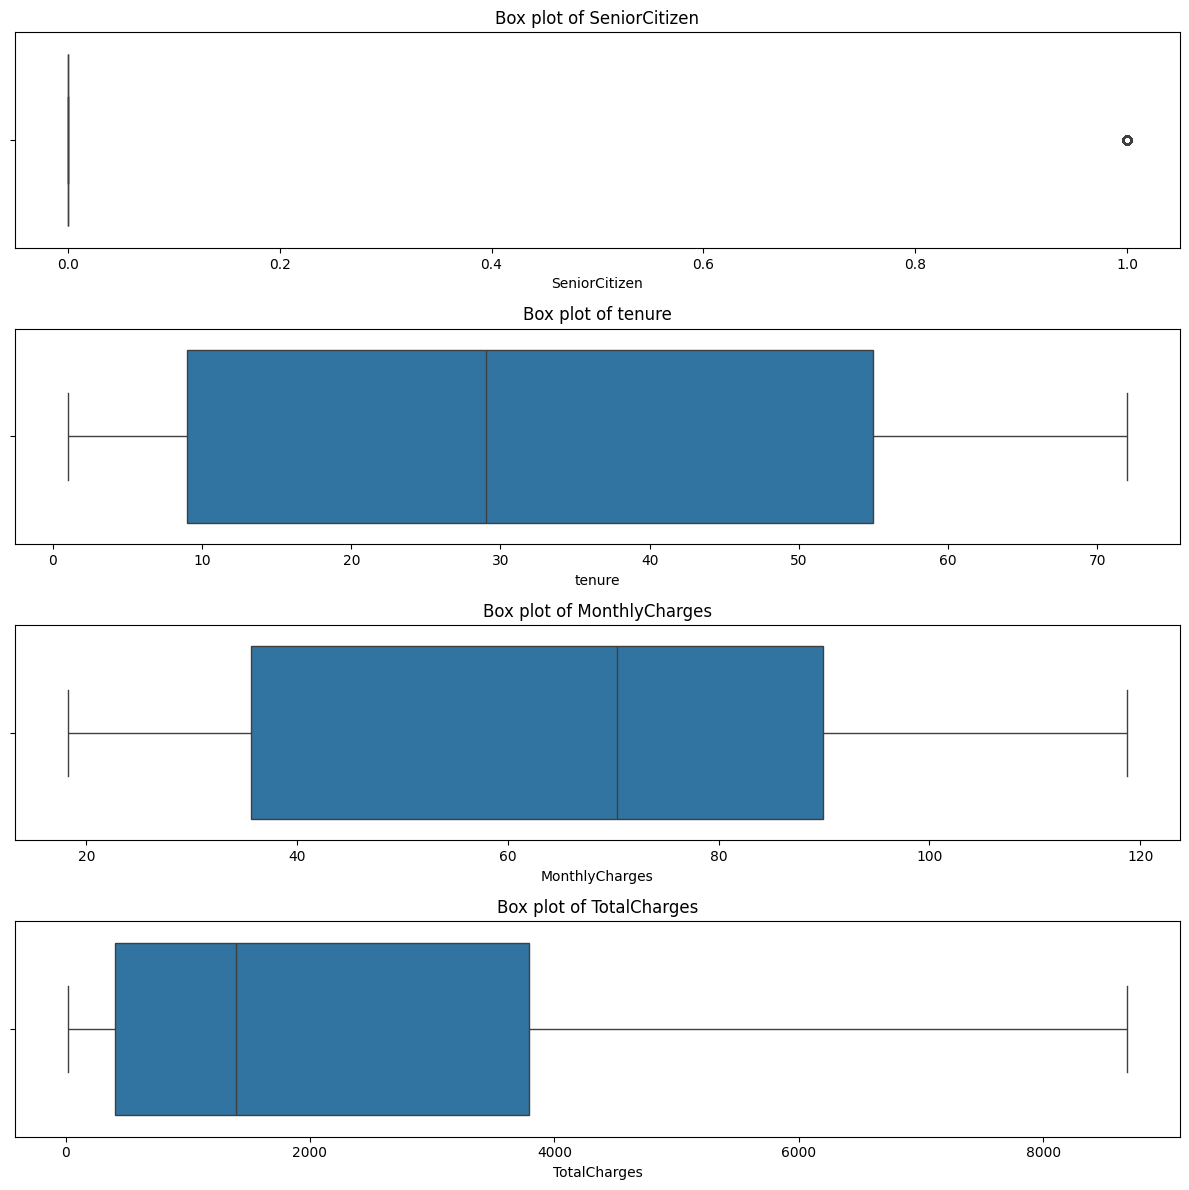

In [ ]:
fig, axes = plt.subplots(len(numerical_features), 1, figsize=(12, len(numerical_features)*3))
for ax, feature in zip(axes, numerical_features):
    sns.boxplot(data=df, x=feature, ax=ax)
    ax.set_title(f'Box plot of {feature}')
plt.tight_layout()

3. Correlation

You can get the correlation between each features using `.corr()`. We droped the `customerID` column because it is not relevant with other features.

In [ ]:
corr = pd.get_dummies(df.drop(columns='customerID'), drop_first=True).corr()
corr

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
SeniorCitizen,1.000000,0.015683,0.219874,0.102411,-0.001819,0.016957,-0.210550,0.008392,-0.008392,0.142996,...,0.105445,-0.182519,0.119842,-0.046491,-0.116205,0.156258,-0.024359,0.171322,-0.152987,0.150541
tenure,0.015683,1.000000,0.246862,0.825880,0.005285,0.381912,0.163386,0.007877,-0.007877,0.332399,...,0.280264,-0.037529,0.285402,0.202338,0.563801,0.004823,0.232800,-0.210197,-0.232181,-0.354049
MonthlyCharges,0.219874,0.246862,1.000000,0.651065,-0.013779,0.097825,-0.112343,0.248033,-0.248033,0.490912,...,0.629668,-0.763191,0.627235,0.004810,-0.073256,0.351930,0.030055,0.271117,-0.376568,0.192858
TotalCharges,0.102411,0.825880,0.651065,1.000000,0.000048,0.319072,0.064653,0.113008,-0.113008,0.469042,...,0.515709,-0.374878,0.519867,0.170569,0.358036,0.157830,0.182663,-0.060436,-0.294708,-0.199484
gender_Male,-0.001819,0.005285,-0.013779,0.000048,1.000000,-0.001379,0.010349,-0.007515,0.007515,-0.008883,...,-0.007124,0.004745,-0.010105,0.007755,-0.003603,-0.011902,0.001632,0.000844,0.013199,-0.008545
Partner_Yes,0.016957,0.381912,0.097825,0.319072,-0.001379,1.000000,0.452269,0.018397,-0.018397,0.142561,...,0.124483,-0.000286,0.118108,0.083067,0.247334,-0.013957,0.082327,-0.083207,-0.096948,-0.149982
Dependents_Yes,-0.210550,0.163386,-0.112343,0.064653,0.010349,0.452269,1.000000,-0.001078,0.001078,-0.024307,...,-0.016499,0.138383,-0.038375,0.069222,0.201699,-0.110131,0.061134,-0.149274,0.056448,-0.163128
PhoneService_Yes,0.008392,0.007877,0.248033,0.113008,-0.007515,0.018397,-0.001078,1.000000,-1.000000,0.279530,...,-0.021383,0.171817,-0.033477,-0.003142,0.004442,0.016696,-0.006916,0.002747,-0.004463,0.011691
MultipleLines_No phone service,-0.008392,-0.007877,-0.248033,-0.113008,0.007515,-0.018397,0.001078,-1.000000,1.000000,-0.279530,...,0.021383,-0.171817,0.033477,0.003142,-0.004442,-0.016696,0.006916,-0.002747,0.004463,-0.011691
MultipleLines_Yes,0.142996,0.332399,0.490912,0.469042,-0.008883,0.142561,-0.024307,0.279530,-0.279530,1.000000,...,0.257804,-0.210794,0.259194,-0.003594,0.106618,0.163746,0.060319,0.083583,-0.227672,0.040033


If the corr is,


*   0 <= corr <= 0.19     -    Very low correlation
*   0.2 <= corr <= 0.39   -    Low correlation
*   0.4 <= corr <= 0.59   -    Moderate
*   0.6 <= corr <= 0.79   -    High correlation.
*   0.8 <= corr <= 1.0    -    Very high correlation.







We can generate a heatmap for this correlation values.

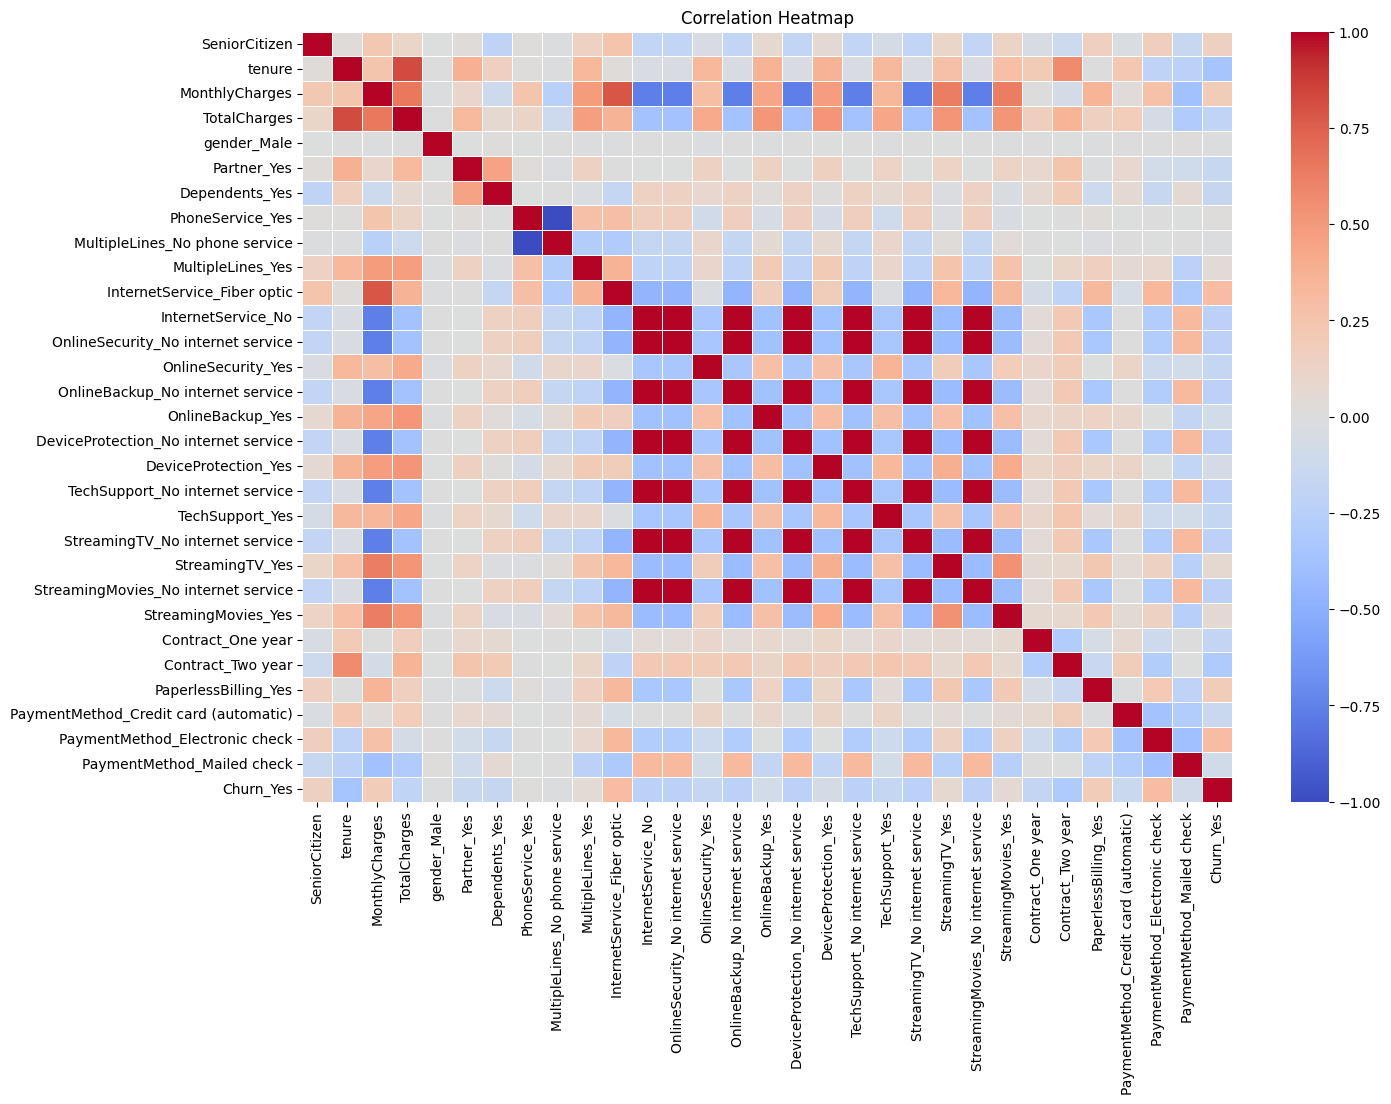

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# **Binning**

Let's find the spread of some columns that contains wide range of numerical values in a graph. We were started with `tenure`. To define the values in a plot we need to import librraies like `plotly.figure_factory` and `plotly.express`.

In this dataset, the `tenure` and `MonthlyCharges` columns contains numerical values spread across a wide range. To simplify the data, reduce noise, potentially improve model performance, and handle non-linearity, we need to discretize these values into bins or intervals. The bin referes to interval or range of values into which the continuous data is divided.  

To make bins we need to know where to start and where to end. Therefore to find the lowest and highest value that avaliabe in the `tenure` column. By using `df['tenure'].max()` and `df['tenure'].min()` we can get the highest and lowest values.

In [ ]:
df['tenure'].max()

72

In [ ]:
df['tenure'].min()

1

Based on the output, the lowest tenure is 1 and highest tenure is 72. Therefore we made 6 bins with interval value of 12. The lables are 0-12, 13-24, 25-36, 37-48, 49-60, 61-72.

The below code will do the binning for `tenure` column.

In [ ]:
df.loc[:, 'tenure_bin'] = pd.cut(df['tenure'], bins=[0, 12, 24, 36, 48, 60, 72], labels=['0-12', '13-24', '25-36', '37-48', '49-60', '61-72'])
df['tenure_bin'].value_counts()

,count
tenure_bin,
0-12,2175
61-72,1407
13-24,1024
25-36,832
49-60,832
37-48,762


Now we are going to do the same steps to column `MonthlyCharges`. First get the lowest and highest values that available in the `MonthlyCharges` column.

In [ ]:
df['MonthlyCharges'].max()

118.75

In [ ]:
df['MonthlyCharges'].min()

18.25

Based on the `df['MonthlyCharges'].max()` and `df['MonthlyCharges'].min()` output, the lowest monthly charge is 18.25 and highest monthly charge is 118.75. Therefore we made 6 bins with interval value of 20. The labels are 0-20, 21-40, 41-60, 61-80,81-100, 101-120.

The below code will do the binning for `MonthlyCharges` column.

In [ ]:
df['MonthlyCharges_bin'] = pd.cut(df['MonthlyCharges'], bins=[0, 20, 40, 60, 80, 100, 120], labels=['0-20', '21-40', '41-60', '61-80', '81-100', '101-120'])
df['tenure_bin'].value_counts()

,count
tenure_bin,
0-12,2175
61-72,1407
13-24,1024
25-36,832
49-60,832
37-48,762


Now we did binning for `tenure` and `MonthlyCharges`. Let's see how its look like in the DataFrame. To do this just run the code `df`.

In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_bin,MonthlyCharges_bin
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12,21-40
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36,41-60
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12,41-60
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48,41-60
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-12,61-80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,13-24,81-100
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,61-72,101-120
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0-12,21-40
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,0-12,61-80


Now you can see there are 2 new columns `tenure_bin` and `MonthlyCharges_bin` in the DataFrame. These columns indicate the category to which the `tenure` and `MonthlyCharges` values belong.

# **Regression**

After binning, we started to doing regression. This method used to examine the relationship between one dependent variable (target) and one or more independent variables (features).

Based on this dataset, regression can be used to predict a numerical value based on other features in the dataset. For example, we could predict `TotalCharges` based on `MonthlyCharges` and `tenure`. Therefore we need to select features(X) and target(y).

We set features(X) as `MonthlyCharges` and `tenure`. Target(y) as `TotalCharges`.

In [ ]:
X = df[['MonthlyCharges', 'tenure']]
y = df['TotalCharges']

Next, we need to split the data into training and testing sets. We allocated 20% of dataset used to test and remaining 80% of dataset used to train.

To do this import `train_test_split` library from `sklearn.model_selection` package.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

After splitting the dataset, fit a linear regression model to the training data. To do this import `LinearRegression` library from `sklearn.linear_model` package.

In [ ]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

Next we did evaluation to the model's performance using metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared.

For this we import `mean_absolute_error`, `mean_squared_error`, `r2_score` from `sklearn.metrics`.

To predict on the test set we used code `reg.predict()`. To calculate evaluation metrics we used code `mean_absolute_error()` and `r2_score()`.

Mean Absolute Error(MAE) measures the average absolute difference between the predicted and actual values. A lower MAE indicates that the model's predictions are closer to the actual values.

Mean Squared Error(MSE) measures the average of the squared differences between the predicted and actual values. A lower MSE indicates better performance, as the model's predictions are closer to the actual values.

R-squared(R²)This metric indicates how well the independent variables (features) explain the variability of the dependent variable (target). An R² value closer to 1 indicates a better fit, meaning the model explains a large portion of the variance in the target variable.

In [ ]:
y_pred = reg.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')


Mean Absolute Error (MAE): 571.0893527607235
Mean Squared Error (MSE): 514283.50231658557
R-squared (R²): 0.9004783340563838


Based on the output, Mean Absolute Error(MAE) is 571.089. This indicates that, on average, the predictions of the `TotalCharges` are off by approximately 571 units. Mean Squared Error(MSE) is 514283.502. This measures the average of the squares of the errors—that is, the average squared difference between the estimated values and what is estimated. MSE is more sensitive to outliers than MAE because the errors are squared. R-squared(R²) is 0.9005. This indicates that approximately 90.05% of the variance in `TotalCharges` can be explained by the model using `MonthlyCharges` and `tenure`. This is a high value, suggesting that the model fits the data well.

# **Clustering**

After regression, we perform clustering to identify groups within the data. As a first step, we selected features for clustering.

We just assume some variables as features such as `MonthlyCharges`, `tenure`, and `TotalCharges`.

In [ ]:
features = df[['MonthlyCharges', 'tenure', 'TotalCharges']]

Next we standardized the data. Standardizing the data is important for clustering algorithms, as it ensures that each feature contributes equally to the distance calculations.

To do this, we imported `StandardScaler` library from `sklearn.preprocessing` package. Then we use code `scaler.fit_transform()` to standardize the features.

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

There are many clustering algorithms available. We selected K-Means algorithm for its simplicity and effectiveness.

Next we need to determine the optimal number of clusters. The Elbow method helps determine the optimal number of clusters by plotting the Within-Cluster Sum of Squares(WCSS) for different numbers of clusters and looking for an "elbow."

To do this we need to import `KMeans` from `sklearn.cluster` and `matplotlib.pyplot`. After that created a list `wcss` to store WCSS values. Then test started to test different numbers of clusters using for loop.


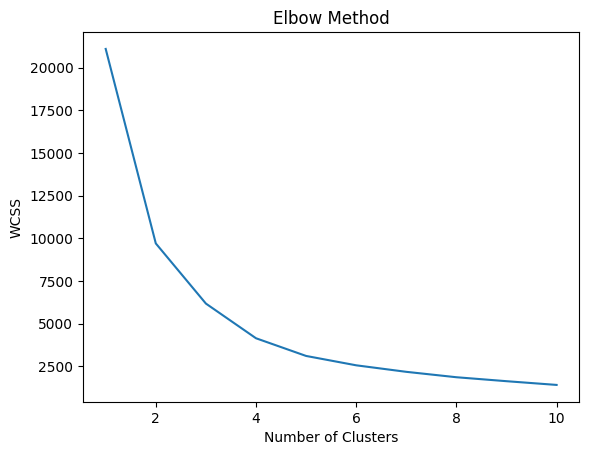

In [ ]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

The output is a Elbow Method graph. It is a visual tool used to determine the optimal number of clusters for K-Means clustering. It helps to find the point where adding more clusters does not significantly improve the model.

For the first few clusters( 1 - 3), there is a steep decrease in WCSS, indicating that adding more clusters significantly improves the model by reducing the within-cluster variance.

The "elbow" of the graph appears to be around 3 or 4 clusters. This is where the rate of decrease in WCSS starts to slow down, and the curve begins to bend.
This suggests that 3 or 4 clusters may be an optimal choice, as adding more clusters beyond this point results in diminishing returns.

Beyond 4 clusters, the WCSS continues to decrease but at a much slower rate. This indicates that additional clusters are not providing as much improvement in reducing the within-cluster variance.

Now fit the K-Means model using the optimal number of clusters determined from the Elbow method. We took optimal number of clusters as 3.

First, initialize K-Means with the optimal number of clusters using code `KMeans()`. Next, fit the model to the standardized features using `fit.()`. Then get the cluster labels using `labels_`. Finally, add cluster labels to the original DataFrame.

In [ ]:
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)

kmeans.fit(scaled_features)

labels = kmeans.labels_

df['Cluster'] = labels
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_bin,MonthlyCharges_bin,Cluster
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12,21-40,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.50,No,25-36,41-60,2
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12,41-60,2
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48,41-60,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-12,61-80,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,One year,Yes,Mailed check,84.80,1990.50,No,13-24,81-100,2
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,61-72,101-120,1
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0-12,21-40,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,0-12,61-80,2


Now you can see there is a new column called `Cluster` added to DataFrame. This label indicates which group or segment each customer belongs to based on the clustering performed on the standardized features.

Cluster 0: Customers with moderate monthly charges and low total charges, potentially indicating new customers.

Cluster 1: Customers with high monthly charges and high total charges, indicating high-value long-term customers.

Cluster 2: Customers with low monthly charges and moderate total charges, indicating customers who might be considering churning



Now let's create a statistical summary for each cluster value what is the mean `tenure`, `MonthlyChargers`, and `TotalCharges`.

In [ ]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
cluster_summary = df.groupby('Cluster')[numeric_columns].mean()

cluster_summary

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Cluster
Cluster,,,,,
0,0.066016,29.620642,26.632241,815.255649,0.0
1,0.208466,58.570323,89.743719,5249.427014,1.0
2,0.201937,13.262668,74.965760,1031.878782,2.0


The output shows the average values for tenure, MonthlyCharges, and TotalCharges for each cluster, which can help you understand the characteristics of customers in each segment.

Now we are going to create visualizations to explore the distribution and properties of each cluster. The output will be a scatter plot using Seaborn and Matplotlib to visualize customer clusters based on their MonthlyCharges and TotalCharges. For that import `seaborn` library and `matplotlib`. We already imported `matplotlib` library. Do the following code to get the graph.

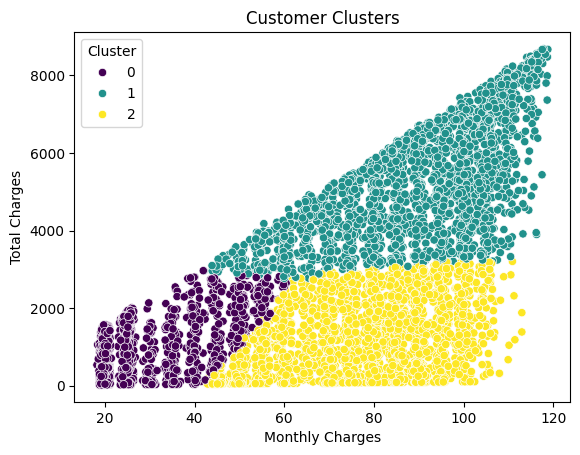

In [ ]:
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Cluster', data=df, palette='viridis')
plt.title('Customer Clusters')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.show()

The scatter plot provides a visual summary of customer clusters based on their monthly and total charges, allowing you to see the distribution and characteristics of each cluster. This can be useful for further analysis and decision-making in customer relationship management and marketing strategies.

# **Integration**

In this mini project, we focus on analyzing the already linked dataset to predict customer churn. Our primary objective is to develop a robust predictive model using machine learning techniques. For this purpose, we will utilize the current dataset exclusively, without integrating data from any external sources. Therefore we do not integrate another dataset with the current dataset.

# **Reduction**



1.   **Dimensionality Reduction**



We used Principal Component Analysis (PCA) for dimensionality reduction. This technique transforms the features of a dataset into a new set of orthogonal (uncorrelated) features called principal components.The main goal is to reduce the dimensionality of the dataset to 2 principal components using PCA.

The below code selects only the numeric columns from the dataset because PCA works with numerical data. It uses the `select_dtypes` method to filter columns of numeric types and stores them in the `features` DataFrame.

In [ ]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
features = df[numeric_columns]

Before applying PCA, it’s important to standardize the features to have a mean of 0 and a standard deviation of 1. This step ensures that each feature contributes equally to the analysis.

The `fit_transform` method standardizes the features by removing the mean and scaling to unit variance. The result, `scaled_features`, is a standardized version of the original features.

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

We create a PCA object with `n_components=2`, which means we want to reduce the dataset to 2 principal components.

The `fit_transform` method is used to compute the principal components and transform the data into the new 2-dimensional space. The result, `pca_features`, contains the transformed data.

In [ ]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

Now the two principal components obtained from PCA are added to the original DataFrame as new columns `PCA1` and `PCA2`. Each row in these columns represents the projection of the original data onto the principal component axes.

In [ ]:
df['PCA1'] = pca_features[:, 0]
df['PCA2'] = pca_features[:, 1]

df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_bin,MonthlyCharges_bin,Cluster,PCA1,PCA2
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,Yes,Electronic check,29.85,29.85,No,0-12,21-40,0,-2.186195,-0.654456
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,Mailed check,56.95,1889.50,No,25-36,41-60,2,-0.115181,0.583276
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,Mailed check,53.85,108.15,Yes,0-12,41-60,2,-1.311383,1.343579
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,Bank transfer (automatic),42.30,1840.75,No,37-48,41-60,0,-0.570548,-1.533997
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,Yes,Electronic check,70.70,151.65,Yes,0-12,61-80,2,-0.992743,1.557438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Mailed check,84.80,1990.50,No,13-24,81-100,2,0.218653,1.131844
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,Credit card (automatic),103.20,7362.90,No,61-72,101-120,1,2.818044,-0.941804
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,Yes,Electronic check,29.60,346.45,No,0-12,21-40,0,-1.901507,-0.885263
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,Yes,Mailed check,74.40,306.60,Yes,0-12,61-80,2,-0.365202,2.249267


In the DataFrame you can clearly see there are two new columns(`PCA1`, `PCA2`) created. The `PCA1` captures the most variance in the data, and the `PCA2` captures the second most variance.

Now we tranformed the dataset and add `PCA1` and `PCA2` as new columns. Therefore, we can visualize the data points in a 2D space using these components, which might help to identify clusters or patterns in customer behavior.

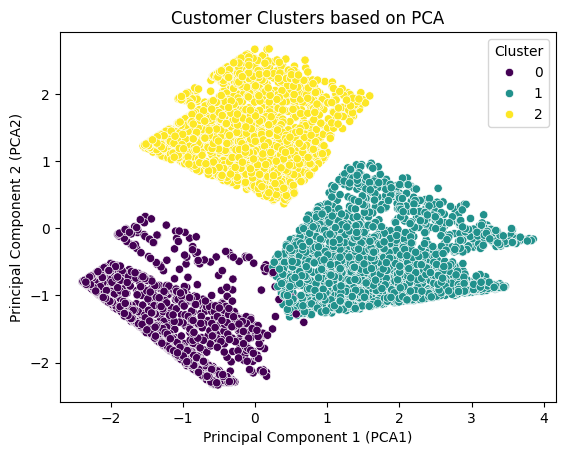

In [ ]:
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis')
plt.title('Customer Clusters based on PCA')
plt.xlabel('Principal Component 1 (PCA1)')
plt.ylabel('Principal Component 2 (PCA2)')
plt.show()

Based on the graph we can understand,

*   If the data points form distinct groups in the PCA plot, it indicates that
there are natural clusters in the data. These clusters can represent different customer segments.
*   If the spread of points along PCA1 and PCA2 can give insights into the variability in customer behavior. A wide spread along PCA1 suggests significant variation along the most important dimension.
*   If clusters overlap significantly, it may indicate that the clusters are not well separated and additional features or clustering techniques might be needed to distinguish them better.











In [ ]:
df.to_csv('Section 2 finished dataset.csv', index=False)


   2. **Cube Aggregation**







Cube aggregation is a technique used in data warehousing and multidimensional databases to summarize and aggregate data along various dimensions. It involves creating a data cube, which is a multi-dimensional array of values, and then performing operations to summarize the data at different levels of granularity.

In the context of our dataset, cube aggregation can help in summarizing and understanding customer data by aggregating values along various dimensions such as `tenure`, `MonthlyCharges`, and `TotalCharges`.

We did cube aggregation using `groupby()` on the dataset by aggregating the `MonthlyCharges` and `TotalCharges` along the `tenure_bin` and `Contract` dimensions.

In [ ]:
cube_aggregation = df.groupby(['tenure_bin', 'Contract'])[['MonthlyCharges', 'TotalCharges']].agg(['mean', 'sum', 'count'])

<ipython-input-143-a39b6c13aa98>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cube_aggregation = df.groupby(['tenure_bin', 'Contract'])[['MonthlyCharges', 'TotalCharges']].agg(['mean', 'sum', 'count'])


Next, we reset index to flatten the DataFrame for better readability.

In [ ]:
cube_aggregation = cube_aggregation.reset_index()
cube_aggregation

tenure_bin        Contract MonthlyCharges                  TotalCharges  \
                                        mean        sum count         mean   
0        0-12  Month-to-month      58.217904  116086.50  1994   276.693430   
1        0-12        One year      35.928455    4419.20   123   303.171545   
2        0-12        Two year      28.766379    1668.45    58   217.846552   
3       13-24  Month-to-month      69.309566   51081.15   737  1257.884193   
4       13-24        One year      44.878680    8841.10   197   863.225381   
5       13-24        Two year      32.306667    2907.60    90   624.129444   
6       25-36  Month-to-month      74.326235   36122.55   486  2238.959979   
7       25-36        One year      58.098800   14524.70   250  1777.244400   
8       25-36        Two year      40.745313    3911.55    96  1285.418229   
9       37-48  Month-to-month      78.422468   24781.50   316  3308.503639   
10      37-48        One year      65.554478   17568.60   268  2803.992537   
11      37-48        Two year      45.979775    8184.40   178  2008.861798   
12      49-60  Month-to-month      82.679274   19346.95   234  4479.145513   
13      49-60        One year      75.128037   24116.10   321  4087.001558   
14      49-60        Two year      55.000722   15235.20   277  3038.262635   
15      61-72  Month-to-month      91.439815    9875.50   108  5975.300000   
16      61-72        One year      84.112460   26327.20   313  5597.442173   
17      61-72        Two year      71.666075   70662.75   986  4961.329260   

                      
           sum count  
0    551726.70  1994  
1     37290.10   123  
2     12635.10    58  
3    927060.65   737  
4    170055.40   197  
5     56171.65    90  
6   1088134.55   486  
7    444311.10   250  
8    123400.15    96  
9   1045487.15   316  
10   751470.00   268  
11   357577.40   178  
12  1048120.05   234  
13  1311927.50   321  
14   841598.75   277  
15   645332.40   108  
16  1751999.40   313  
17  4891870.65   986

The output is a DataFrame. It is showing a summarized statistics for `MonthlyCharges` and `TotalCharges` for each combination of `tenure_bin` and `Contract`. This can help in understanding patterns such as:



*   The mean values indicate the average monthly and total charges for customers in each tenure bin and contract type.
*   The sum values give the total revenue generated from customers in each category.
*   The count values show how many customers fall into each category.



3. **Attribute Subset Selection/Feature Selection**

It is a process in machine learning and data preprocessing where you select a subset of relevant features (attributes) for building your model. The goal is to improve the model's performance by removing irrelevant, redundant, or noisy features.

We need to define feature(X) and target(y). All other columns as features expect target column. We choosed target as `Churn` column because in this dataset, churn prediction is typically a key business objective. Churn refers to the phenomenon where customers stop using the company's services, and predicting churn can help the company identify customers at risk of leaving. This allows the company to take proactive measures to retain those customers.

In [ ]:
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

X = df.drop(['Churn'], axis=1)
y = df['Churn']

The below code will convert categorical variables to numerical(if any)

In [ ]:
X = pd.get_dummies(X, drop_first=True)

Now we applied feature selection method to identify the most relevant features. In the below code we wrote code to select top 20 features.

In [ ]:
selector = SelectKBest(score_func=f_classif, k=20)
X_selected = selector.fit_transform(X, y)

We should evaluate the selected features and choose the subset that improves the model's performance.

In [ ]:
selected_features = X.columns[selector.get_support()]
selected_features

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'Cluster', 'PCA2',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service',
       'DeviceProtection_No internet service',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service',
       'StreamingMovies_No internet service', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Electronic check', 'tenure_bin_61-72'],
      dtype='object')

Based on the output, mentioned column names are the selected features.

We created a new DataFrame `df_selected` for selected features and added the target column `Churn` to that.

In [ ]:
df_selected = pd.DataFrame(X_selected, columns=selected_features)
df_selected['Churn'] = y.values
df_selected

,tenure,MonthlyCharges,TotalCharges,Cluster,PCA2,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingMovies_No internet service,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Electronic check,tenure_bin_61-72,Churn
0,1.0,29.85,29.85,0.0,-0.654456,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
1,34.0,56.95,1889.50,2.0,0.583276,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
2,2.0,53.85,108.15,2.0,1.343579,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3,45.0,42.30,1840.75,0.0,-1.533997,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
4,2.0,70.70,151.65,2.0,1.557438,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,24.0,84.80,1990.50,2.0,1.131844,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
7028,72.0,103.20,7362.90,1.0,-0.941804,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0
7029,11.0,29.60,346.45,0.0,-0.885263,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
7030,4.0,74.40,306.60,2.0,2.249267,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1


Based on the new DataFrame you can get benefits such as:

*   Focus on the most relevant features
*   The model can make more accurate predictions
*   Simplifies the model
*   making it easier to interpret and faster to train
*   Reduces the risk of overfitting
*   better generalization on new data


**4. Numerosity Reduction using Sampling**

It is a technique to reduce the size of the dataset while maintaining its statistical properties. This can help in improving computational efficiency and manageability of data.

As a first step, we need to identify the size and structure of the dataset and
determine the percentage or number of samples to retain.

To get basic information about the dataset, we used info(), describe().

In [ ]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   tenure                                7032 non-null   float64
 1   MonthlyCharges                        7032 non-null   float64
 2   TotalCharges                          7032 non-null   float64
 3   Cluster                               7032 non-null   float64
 4   PCA2                                  7032 non-null   float64
 5   InternetService_Fiber optic           7032 non-null   float64
 6   InternetService_No                    7032 non-null   float64
 7   OnlineSecurity_No internet service    7032 non-null   float64
 8   OnlineSecurity_Yes                    7032 non-null   float64
 9   OnlineBackup_No internet service      7032 non-null   float64
 10  DeviceProtection_No internet service  7032 non-null   float64
 11  TechSupport_No in

In [ ]:
df_selected.describe()

,tenure,MonthlyCharges,TotalCharges,Cluster,PCA2,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingMovies_No internet service,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Electronic check,tenure_bin_61-72,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7.032000e+03,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441,1.075796,-3.334458e-17,0.440273,0.216155,0.216155,0.286547,0.216155,...,0.216155,0.290102,0.216155,0.216155,0.209329,0.239619,0.592719,0.336320,0.200085,0.265785
std,24.545260,30.085974,2266.771362,0.825786,1.273071e+00,0.496455,0.411650,0.411650,0.452180,0.411650,...,0.411650,0.453842,0.411650,0.411650,0.406858,0.426881,0.491363,0.472483,0.400092,0.441782
min,1.000000,18.250000,18.800000,0.000000,-2.334100e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,35.587500,401.450000,0.000000,-9.724254e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,70.350000,1397.475000,1.000000,-3.524832e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,55.000000,89.862500,3794.737500,2.000000,1.255467e+00,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,72.000000,118.750000,8684.800000,2.000000,2.673849e+00,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Based on the output of `info()` and `describe()` We decided to allocate 20% of the dataset as sample.

In [ ]:
sample_fraction = 0.2

After, we started to perform random sampling.

In [ ]:
df_sampled = df_selected.sample(frac=sample_fraction, random_state=42)
df_sampled

,tenure,MonthlyCharges,TotalCharges,Cluster,PCA2,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingMovies_No internet service,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Electronic check,tenure_bin_61-72,Churn
2476,61.0,25.00,1501.75,0.0,-1.344356,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0
6773,19.0,24.70,465.85,0.0,-1.118123,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0
6116,13.0,102.25,1359.00,2.0,1.634487,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3047,37.0,55.05,2030.75,0.0,-1.228665,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4092,6.0,29.45,161.45,0.0,-0.770908,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423,1.0,50.45,50.45,2.0,1.324805,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1
1728,1.0,19.05,19.05,0.0,-0.793133,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0
5241,12.0,94.55,1173.55,2.0,1.572096,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
5456,26.0,56.05,1553.20,2.0,0.761492,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0


Based on the output you can see the random sample DataFrame that selected from overall dataset.

You can find the size and information of the sample by using `shape()` and `describe()`.

In [ ]:
df_sampled.shape

(1406, 21)

Based on the output, the sample dataset size is 1406 rows and 11 columns.

In [ ]:
df_sampled.describe()

,tenure,MonthlyCharges,TotalCharges,Cluster,PCA2,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingMovies_No internet service,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Electronic check,tenure_bin_61-72,Churn
count,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,...,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000
mean,32.739687,65.229623,2315.607006,1.093883,0.016562,0.443812,0.203414,0.203414,0.283073,0.203414,...,0.203414,0.291607,0.203414,0.203414,0.199858,0.239687,0.598862,0.329303,0.200569,0.266003
std,24.569818,29.730212,2274.809905,0.821251,1.270084,0.497010,0.402681,0.402681,0.450652,0.402681,...,0.402681,0.454664,0.402681,0.402681,0.400036,0.427044,0.490303,0.470127,0.400569,0.442023
min,1.000000,18.700000,18.800000,0.000000,-2.334100,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.250000,39.962500,416.750000,0.000000,-0.971426,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,70.350000,1424.750000,1.000000,-0.290471,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,56.000000,89.850000,3882.487500,2.000000,1.264018,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,72.000000,118.600000,8670.100000,2.000000,2.665985,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


This will ensures that you are working with a reduced, yet informative, subset of your data, making further analysis and modeling more efficient.

# **Transformation**

1. **Normalization**

Normalization scales the data to a standard range, typically [0, 1].

To work with normalization, first initialize the MinMaxScaler() and apply normalization to the selected features.

In [ ]:
scaler = MinMaxScaler()

normalized_features = scaler.fit_transform(df_sampled.drop(columns=['Churn']))

We created a DataFrame with normalized feature and added the target variable back to the DataFrame.

In [ ]:
df_normalized = pd.DataFrame(normalized_features, columns=df_sampled.columns[:-1])
df_normalized['Churn'] = df_sampled['Churn'].values
df_normalized

,tenure,MonthlyCharges,TotalCharges,Cluster,PCA2,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingMovies_No internet service,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Electronic check,tenure_bin_61-72,Churn
0,0.845070,0.063063,0.171414,0.0,0.197946,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0
1,0.253521,0.060060,0.051674,0.0,0.243191,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0
2,0.169014,0.836336,0.154913,1.0,0.793704,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3,0.507042,0.363864,0.232560,0.0,0.221083,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,0.070423,0.107608,0.016489,0.0,0.312633,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401,0.000000,0.317818,0.003658,1.0,0.731769,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1
1402,0.000000,0.003504,0.000029,0.0,0.308188,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0
1403,0.154930,0.759259,0.133477,1.0,0.781226,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1404,0.352113,0.373874,0.177361,1.0,0.619108,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0


2. **Attribute Selection and Derive New Attributes**

We derived new attributes that might be useful. Here, we can create a new attribute called `MonthlyTenure` which is the ratio of `TotalCharges` to `MonthlyCharges`.

In [ ]:
df_normalized['MonthlyTenure'] = df_normalized['TotalCharges'] / df_normalized['MonthlyCharges']

df_normalized['MonthlyTenure'].replace([np.inf, -np.inf], np.nan, inplace=True)
df_normalized['MonthlyTenure'].fillna(0, inplace=True)

df_normalized

,tenure,MonthlyCharges,TotalCharges,Cluster,PCA2,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,...,TechSupport_Yes,StreamingTV_No internet service,StreamingMovies_No internet service,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Electronic check,tenure_bin_61-72,Churn,MonthlyTenure
0,0.845070,0.063063,0.171414,0.0,0.197946,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0,2.718129
1,0.253521,0.060060,0.051674,0.0,0.243191,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.860377
2,0.169014,0.836336,0.154913,1.0,0.793704,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.185228
3,0.507042,0.363864,0.232560,0.0,0.221083,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.639141
4,0.070423,0.107608,0.016489,0.0,0.312633,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.153231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401,0.000000,0.317818,0.003658,1.0,0.731769,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1,0.011511
1402,0.000000,0.003504,0.000029,0.0,0.308188,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.008248
1403,0.154930,0.759259,0.133477,1.0,0.781226,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0.175799
1404,0.352113,0.373874,0.177361,1.0,0.619108,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0.474386


You can see we select important features and derives new ones called `MonthlyTenure`.

3. **Discretization**

Discretization replaces raw continuous values with interval values. We discretized the `MonthlyCharges` and `TotalCharges` columns.

In [ ]:
df_normalized['MonthlyChargesBinned'] = pd.cut(df_normalized['MonthlyCharges'], bins=5, labels=False)
df_normalized['TotalChargesBinned'] = pd.cut(df_normalized['TotalCharges'], bins=5, labels=False)

df_normalized[['MonthlyCharges', 'MonthlyChargesBinned', 'TotalCharges', 'TotalChargesBinned']]

,MonthlyCharges,MonthlyChargesBinned,TotalCharges,TotalChargesBinned
0,0.063063,0,0.171414,0
1,0.060060,0,0.051674,0
2,0.836336,4,0.154913,0
3,0.363864,1,0.232560,1
4,0.107608,0,0.016489,0
...,...,...,...,...
1401,0.317818,1,0.003658,0
1402,0.003504,0,0.000029,0
1403,0.759259,3,0.133477,0
1404,0.373874,1,0.177361,0


Based on the output you can understand we converted continuous values into intervals.

4. **Concept Hierarchy Generation**

For concept hierarchy generation, we converted low-level attributes to higher-level attributes. For that we converted `MonthlyChargesBinned` into a conceptual hierarchy.

In [ ]:
concept_hierarchy = {
    0: 'Very Low',
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}

df_normalized['MonthlyChargesCategory'] = df_normalized['MonthlyChargesBinned'].map(concept_hierarchy)
df_normalized['TotalChargesCategory'] = df_normalized['TotalChargesBinned'].map(concept_hierarchy)

df_normalized[['MonthlyChargesBinned', 'MonthlyChargesCategory', 'TotalChargesBinned', 'TotalChargesCategory']]

,MonthlyChargesBinned,MonthlyChargesCategory,TotalChargesBinned,TotalChargesCategory
0,0,Very Low,0,Very Low
1,0,Very Low,0,Very Low
2,4,Very High,0,Very Low
3,1,Low,1,Low
4,0,Very Low,0,Very Low
...,...,...,...,...
1401,1,Low,0,Very Low
1402,0,Very Low,0,Very Low
1403,3,High,0,Very Low
1404,1,Low,0,Very Low


Based on the output, we converted binned values into higher-level conceptual categories. However, we do not consider the categorical values of columns `MonthlyChargesCategory` and `TotalChargesCategory`. Therefore, we removed those two columns from the DataFrame.

In [ ]:
df_normalized = df_normalized.drop(['MonthlyChargesCategory', 'TotalChargesCategory'], axis=1)
df_normalized

,tenure,MonthlyCharges,TotalCharges,Cluster,PCA2,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,...,StreamingMovies_No internet service,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Electronic check,tenure_bin_61-72,Churn,MonthlyTenure,MonthlyChargesBinned,TotalChargesBinned
0,0.845070,0.063063,0.171414,0.0,0.197946,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0,2.718129,0,0
1,0.253521,0.060060,0.051674,0.0,0.243191,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0,0.860377,0,0
2,0.169014,0.836336,0.154913,1.0,0.793704,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1,0.185228,4,0
3,0.507042,0.363864,0.232560,0.0,0.221083,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0,0.639141,1,1
4,0.070423,0.107608,0.016489,0.0,0.312633,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.153231,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401,0.000000,0.317818,0.003658,1.0,0.731769,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1,0.011511,1,0
1402,0.000000,0.003504,0.000029,0.0,0.308188,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0,0.008248,0,0
1403,0.154930,0.759259,0.133477,1.0,0.781226,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0,0.175799,3,0
1404,0.352113,0.373874,0.177361,1.0,0.619108,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0,0.474386,1,0


Upto this point we completed the data preprocessing part and our finalized DataFrame `df_normalized` is ready for predictions.

In [ ]:
df.to_csv('Section 3 finished dataset.csv', index=False)

# **Train a Model**

Now we are ready to train a model. There are multiple training model. We will experiment our dataset with each of them.

1. Logistic Regression

As a first step we have to split the data into training and testing sets. For this we choosed column Churn.

In [ ]:
X = df_normalized.drop('Churn', axis=1)
y = df_normalized['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We trained the Logistic Reression model.

In [ ]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

We evaluate the Logistic Regression model's performance using accuracy score and classification report.

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_pred))

Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       207
           1       0.60      0.48      0.53        75

    accuracy                           0.78       282
   macro avg       0.71      0.68      0.69       282
weighted avg       0.76      0.78      0.77       282



By using the Logistic Regression model we made predictions on test set.

In [ ]:
churn_probabilities = model.predict_proba(X_test)[:, 1]

X_test['Churn_Probabilities'] = churn_probabilities
X_test['Churn_Predictions'] = y_pred

X_test

,tenure,MonthlyCharges,TotalCharges,Cluster,PCA2,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Electronic check,tenure_bin_61-72,MonthlyTenure,MonthlyChargesBinned,TotalChargesBinned,Churn_Probabilities,Churn_Predictions
1075,0.042254,0.377377,0.024973,1.0,0.731826,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.066175,1,0,0.581973,1
1015,0.774648,0.411411,0.397472,0.5,0.302864,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.966118,2,1,0.023299,0
650,1.000000,0.457958,0.534290,0.5,0.368966,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.166678,2,2,0.018736,0
447,0.873239,0.008008,0.138280,0.0,0.041574,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,17.267690,0,0,0.000020,0
1290,1.000000,0.711712,0.750367,0.5,0.259806,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.054313,3,3,0.008021,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,0.732394,0.773273,0.580040,0.5,0.378574,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.750110,3,2,0.109730,0
1237,0.197183,0.832833,0.190544,1.0,0.779094,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.228790,4,0,0.366522,0
380,0.507042,0.011011,0.081756,0.0,0.154408,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,7.424977,0,0,0.001322,0
354,0.464789,0.463463,0.247211,1.0,0.599254,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.533400,2,1,0.122910,0


In the output you can see there are two new columns indicate the `Churn_Probabilities` and `Churn_Predictions` based on the data.

We filtered those two columns and added a percentage column for easy to unnderstand.

In [ ]:
X_test['Churn_Probabilities_Percentage'] = X_test['Churn_Probabilities'] * 100
X_test[['Churn_Probabilities', 'Churn_Predictions', 'Churn_Probabilities_Percentage']]

,Churn_Probabilities,Churn_Predictions,Churn_Probabilities_Percentage
1075,0.581973,1,58.197330
1015,0.023299,0,2.329920
650,0.018736,0,1.873607
447,0.000020,0,0.002026
1290,0.008021,0,0.802058
...,...,...,...
188,0.109730,0,10.973003
1237,0.366522,0,36.652218
380,0.001322,0,0.132205
354,0.122910,0,12.290972


Based on the output you can clearly see when the `Churn_Probabilities_Percentage` is 57.304817%, `Churn_Predictions` is set to 1. For all the other values less than 50% has 0 in the `Churn_Predictions`.

Therefore we can understand that if the `Churn_Probabilities_Percentage` is greater than or equal to 50% there is more chance that the particular customer can leave the service provider. If the `Churn_Probabilities_Percentage` is less than 50% there is less chance to that particular customer leave the service provider.

Also, based on the `Churn_Probabilities_Percentage` you can make decisions for a particular customer.

We also included the visual representation.

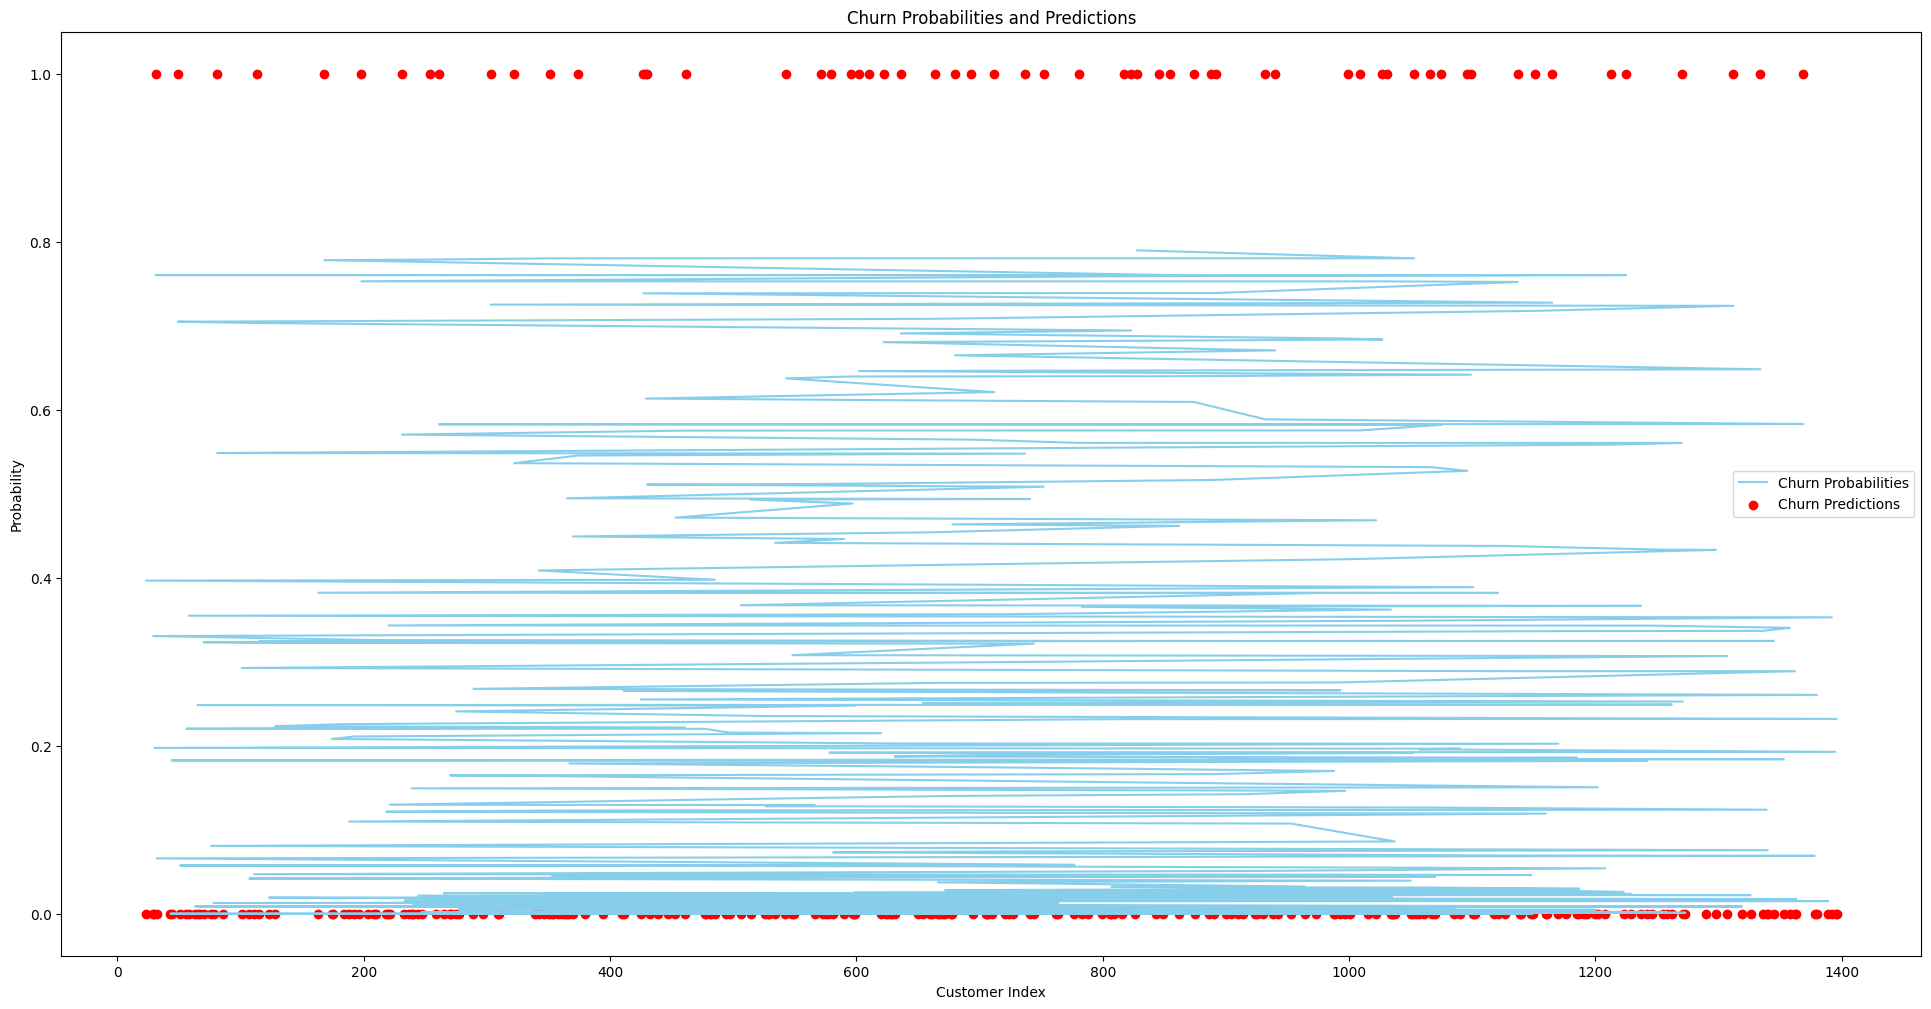

In [ ]:
X_test_sorted = X_test.sort_values(by='Churn_Probabilities')

plt.figure(figsize=(24, 12))

plt.plot(X_test_sorted.index, X_test_sorted['Churn_Probabilities'], label='Churn Probabilities', color='skyblue')
plt.scatter(X_test_sorted.index, X_test_sorted['Churn_Predictions'], label='Churn Predictions', color='red')

plt.title('Churn Probabilities and Predictions')
plt.xlabel('Customer Index')
plt.ylabel('Probability')
plt.legend()
plt.show()

2. Decision Tree

We split the data into training and testing sets.

In [ ]:
X = df_normalized.drop('Churn', axis=1)
y = df_normalized['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We trained the Decision Tree model.

In [ ]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

We evaluate the Decision Tree model's performance using accuracy score and classification report.

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_pred))

Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       207
           1       0.46      0.40      0.43        75

    accuracy                           0.72       282
   macro avg       0.63      0.62      0.62       282
weighted avg       0.70      0.72      0.71       282



By using the Decision Tree model, we made predictions on test set.

In [ ]:
X_test['Churn_Probabilities'] = churn_probabilities
X_test['Churn_Predictions'] = y_pred

X_test

,tenure,MonthlyCharges,TotalCharges,Cluster,PCA2,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Electronic check,tenure_bin_61-72,MonthlyTenure,MonthlyChargesBinned,TotalChargesBinned,Churn_Probabilities,Churn_Predictions
1075,0.042254,0.377377,0.024973,1.0,0.731826,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.066175,1,0,0.581973,1
1015,0.774648,0.411411,0.397472,0.5,0.302864,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.966118,2,1,0.023299,0
650,1.000000,0.457958,0.534290,0.5,0.368966,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.166678,2,2,0.018736,0
447,0.873239,0.008008,0.138280,0.0,0.041574,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,17.267690,0,0,0.000020,0
1290,1.000000,0.711712,0.750367,0.5,0.259806,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.054313,3,3,0.008021,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,0.732394,0.773273,0.580040,0.5,0.378574,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.750110,3,2,0.109730,0
1237,0.197183,0.832833,0.190544,1.0,0.779094,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.228790,4,0,0.366522,0
380,0.507042,0.011011,0.081756,0.0,0.154408,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,7.424977,0,0,0.001322,0
354,0.464789,0.463463,0.247211,1.0,0.599254,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.533400,2,1,0.122910,0


In the output you can see there are two new columns indicate the `Churn_Probabilities` and `Churn_Predictions` based on the data.

We filtered those two columns and added a percentage column to understand easily.

In [ ]:
X_test['Churn_Probabilities_Percentage'] = X_test['Churn_Probabilities'] * 100
X_test[['Churn_Probabilities', 'Churn_Predictions', 'Churn_Probabilities_Percentage']]

,Churn_Probabilities,Churn_Predictions,Churn_Probabilities_Percentage
1075,0.581973,1,58.197330
1015,0.023299,0,2.329920
650,0.018736,0,1.873607
447,0.000020,0,0.002026
1290,0.008021,0,0.802058
...,...,...,...
188,0.109730,0,10.973003
1237,0.366522,0,36.652218
380,0.001322,0,0.132205
354,0.122910,0,12.290972


Similar outcome like Logistic Regression model.

We also included the visual representation of the Decision Tree model's prediction.

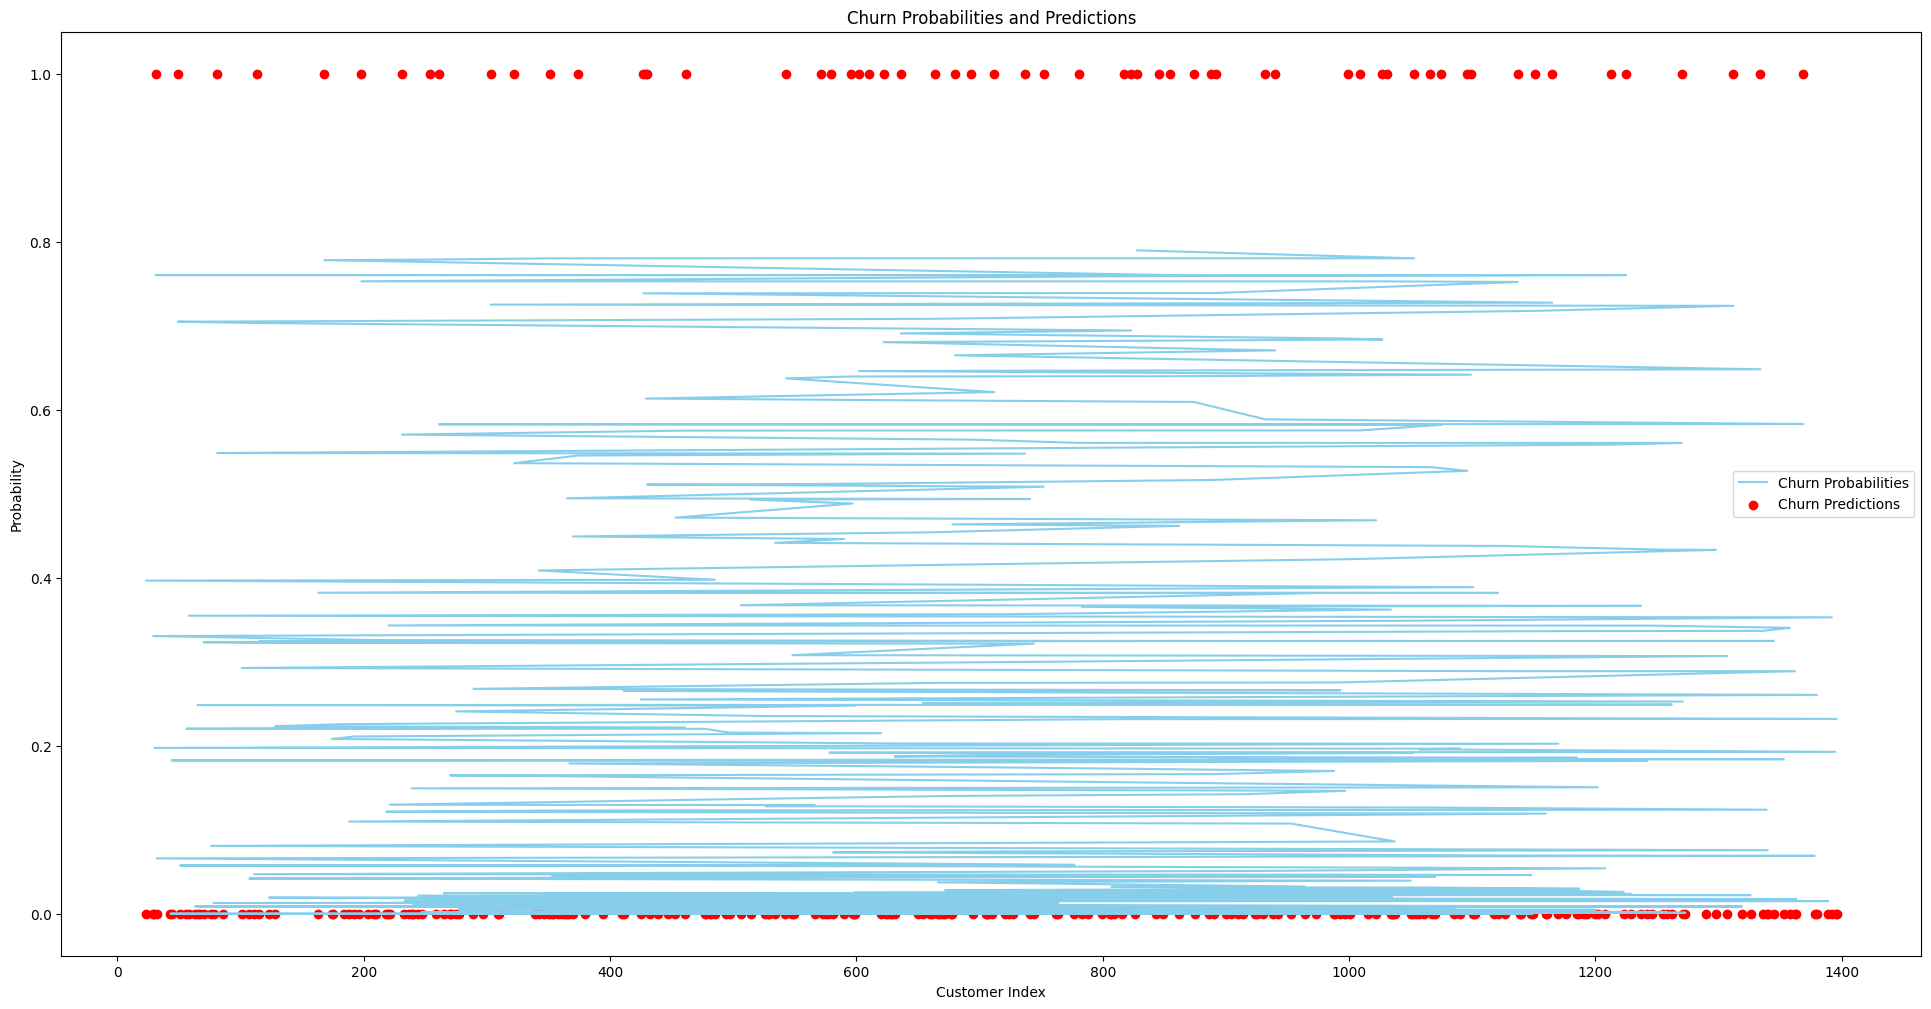

In [ ]:
plt.figure(figsize=(24, 12))

plt.plot(X_test_sorted.index, X_test_sorted['Churn_Probabilities'], label='Churn Probabilities', color='skyblue')
plt.scatter(X_test_sorted.index, X_test_sorted['Churn_Predictions'], label='Churn Predictions', color='red')

plt.title('Churn Probabilities and Predictions')
plt.xlabel('Customer Index')
plt.ylabel('Probability')
plt.legend()
plt.show()

3. Random Forest

We split the data into training and testing sets.

In [ ]:
X = df_normalized.drop('Churn', axis=1)
y = df_normalized['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We trained the Random Forest model and made predictions.

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

We evaluate the Random Forest model's performance using accuracy score and classification report.

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_pred))

Accuracy: 0.76
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       207
           1       0.56      0.48      0.52        75

    accuracy                           0.76       282
   macro avg       0.69      0.67      0.68       282
weighted avg       0.75      0.76      0.76       282



By using the Random Forest model, we made predictions on test set.

In [ ]:
X_test['Churn_Probabilities'] = churn_probabilities
X_test['Churn_Predictions'] = y_pred

X_test

,tenure,MonthlyCharges,TotalCharges,Cluster,PCA2,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Electronic check,tenure_bin_61-72,MonthlyTenure,MonthlyChargesBinned,TotalChargesBinned,Churn_Probabilities,Churn_Predictions
1075,0.042254,0.377377,0.024973,1.0,0.731826,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.066175,1,0,0.581973,1
1015,0.774648,0.411411,0.397472,0.5,0.302864,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.966118,2,1,0.023299,0
650,1.000000,0.457958,0.534290,0.5,0.368966,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.166678,2,2,0.018736,0
447,0.873239,0.008008,0.138280,0.0,0.041574,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,17.267690,0,0,0.000020,0
1290,1.000000,0.711712,0.750367,0.5,0.259806,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.054313,3,3,0.008021,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,0.732394,0.773273,0.580040,0.5,0.378574,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.750110,3,2,0.109730,0
1237,0.197183,0.832833,0.190544,1.0,0.779094,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.228790,4,0,0.366522,1
380,0.507042,0.011011,0.081756,0.0,0.154408,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,7.424977,0,0,0.001322,0
354,0.464789,0.463463,0.247211,1.0,0.599254,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.533400,2,1,0.122910,0


In the output you can see there are two new columns indicate the `Churn_Probabilities` and `Churn_Predictions` based on the data.

We filtered those two columns and added a percentage column to understand easily.

In [ ]:
X_test['Churn_Probabilities_Percentage'] = X_test['Churn_Probabilities'] * 100
X_test[['Churn_Probabilities', 'Churn_Predictions', 'Churn_Probabilities_Percentage']]

,Churn_Probabilities,Churn_Predictions,Churn_Probabilities_Percentage
1075,0.581973,1,58.197330
1015,0.023299,0,2.329920
650,0.018736,0,1.873607
447,0.000020,0,0.002026
1290,0.008021,0,0.802058
...,...,...,...
188,0.109730,0,10.973003
1237,0.366522,1,36.652218
380,0.001322,0,0.132205
354,0.122910,0,12.290972


Similar outcome like Logistic Regression model and Decision Tree model.

We also included the visual representation of the Decision Tree model's prediction.

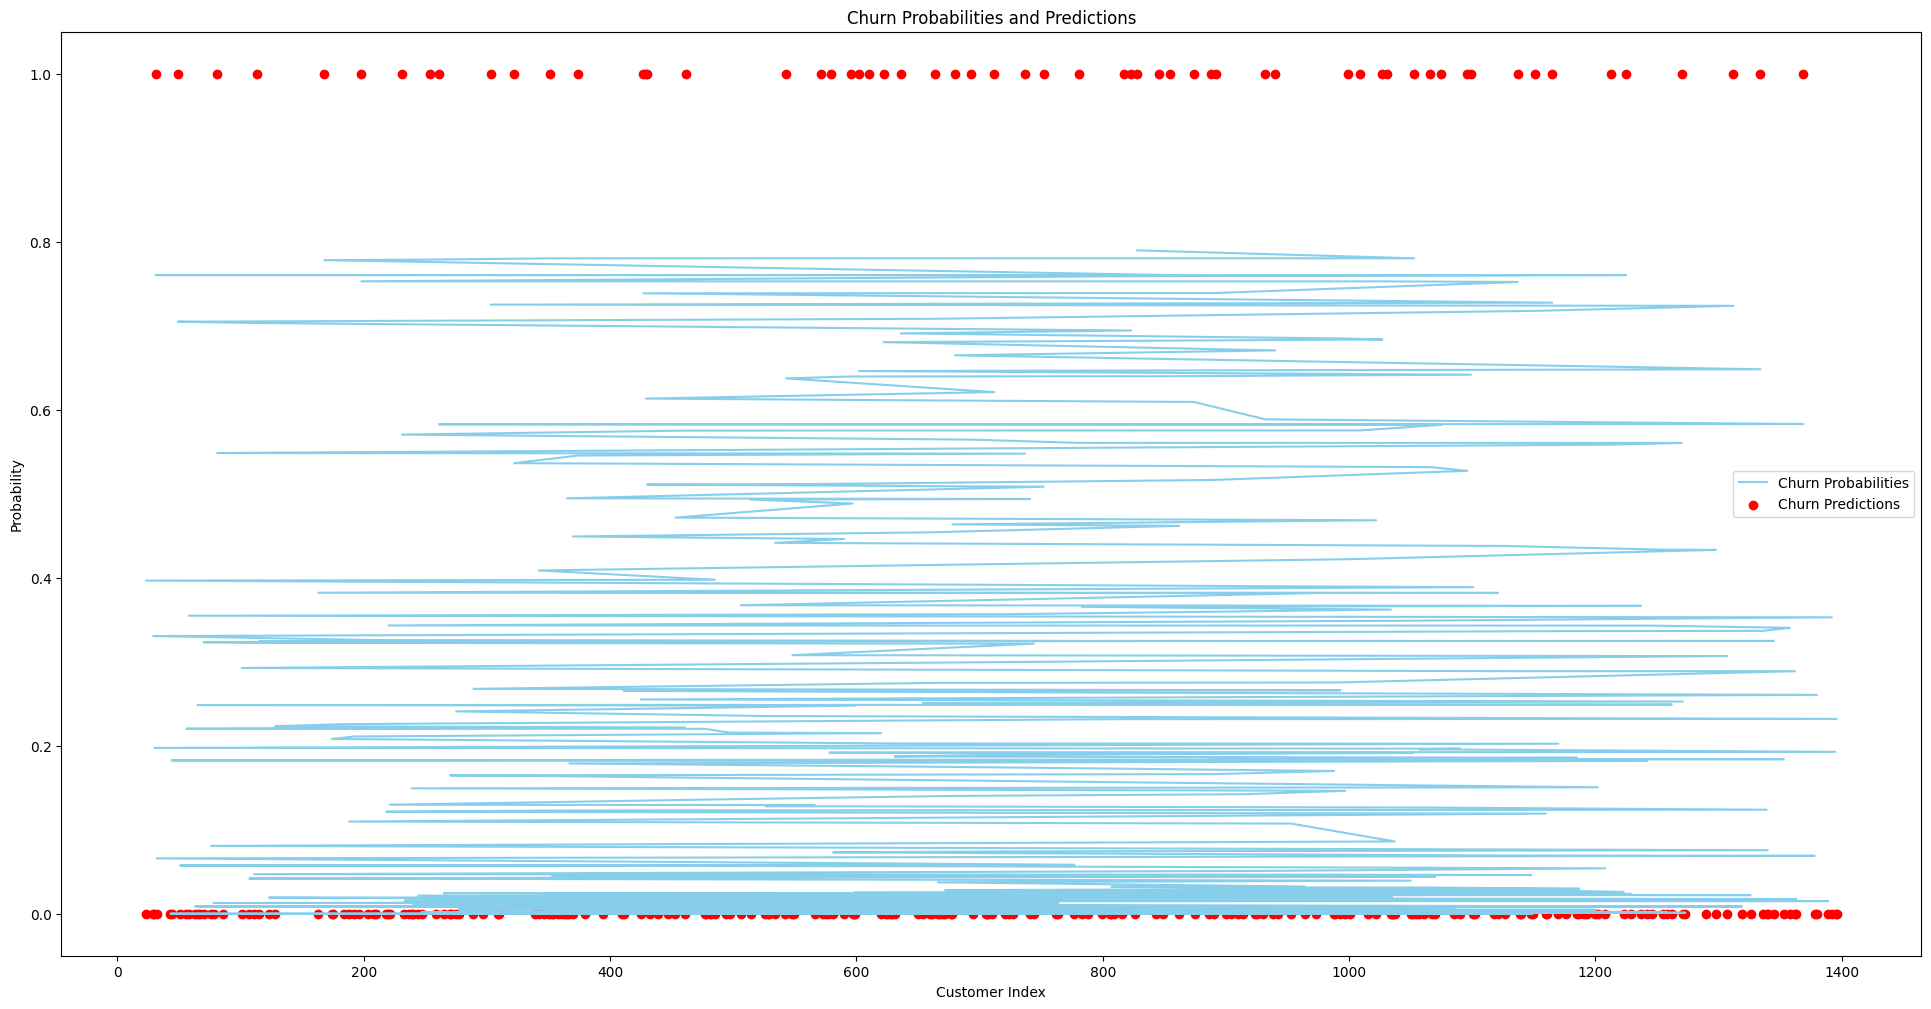

In [ ]:
plt.figure(figsize=(24, 12))

plt.plot(X_test_sorted.index, X_test_sorted['Churn_Probabilities'], label='Churn Probabilities', color='skyblue')
plt.scatter(X_test_sorted.index, X_test_sorted['Churn_Predictions'], label='Churn Predictions', color='red')

plt.title('Churn Probabilities and Predictions')
plt.xlabel('Customer Index')
plt.ylabel('Probability')
plt.legend()
plt.show()

4. Gradient Boosting

We split the data into training and testing sets.

In [ ]:
X = df_normalized.drop('Churn', axis=1)
y = df_normalized['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We trained the Gradient Boosting model and made predictions.

In [ ]:
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

We evaluate the Gradient Boosting model's performance using accuracy score and classification report.

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_pred))

Accuracy: 0.76
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       207
           1       0.55      0.51      0.53        75

    accuracy                           0.76       282
   macro avg       0.69      0.68      0.68       282
weighted avg       0.75      0.76      0.76       282



By using the Random Forest model, we made predictions on test set.

In [ ]:
X_test['Churn_Probabilities'] = churn_probabilities
X_test['Churn_Predictions'] = y_pred

X_test

,tenure,MonthlyCharges,TotalCharges,Cluster,PCA2,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Electronic check,tenure_bin_61-72,MonthlyTenure,MonthlyChargesBinned,TotalChargesBinned,Churn_Probabilities,Churn_Predictions
1075,0.042254,0.377377,0.024973,1.0,0.731826,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.066175,1,0,0.581973,1
1015,0.774648,0.411411,0.397472,0.5,0.302864,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.966118,2,1,0.023299,0
650,1.000000,0.457958,0.534290,0.5,0.368966,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.166678,2,2,0.018736,0
447,0.873239,0.008008,0.138280,0.0,0.041574,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,17.267690,0,0,0.000020,0
1290,1.000000,0.711712,0.750367,0.5,0.259806,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.054313,3,3,0.008021,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,0.732394,0.773273,0.580040,0.5,0.378574,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.750110,3,2,0.109730,0
1237,0.197183,0.832833,0.190544,1.0,0.779094,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.228790,4,0,0.366522,0
380,0.507042,0.011011,0.081756,0.0,0.154408,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,7.424977,0,0,0.001322,0
354,0.464789,0.463463,0.247211,1.0,0.599254,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.533400,2,1,0.122910,0


In the output you can see there are two new columns indicate the `Churn_Probabilities` and `Churn_Predictions` based on the data.

We filtered those two columns and added a percentage column to understand easily.

In [ ]:
X_test['Churn_Probabilities_Percentage'] = X_test['Churn_Probabilities'] * 100
X_test[['Churn_Probabilities', 'Churn_Predictions', 'Churn_Probabilities_Percentage']]

,Churn_Probabilities,Churn_Predictions,Churn_Probabilities_Percentage
1075,0.581973,1,58.197330
1015,0.023299,0,2.329920
650,0.018736,0,1.873607
447,0.000020,0,0.002026
1290,0.008021,0,0.802058
...,...,...,...
188,0.109730,0,10.973003
1237,0.366522,0,36.652218
380,0.001322,0,0.132205
354,0.122910,0,12.290972


Similar outcome like Logistic Regression model, Decision Tree model and Random Forest model.

We also included the visual representation of the Gradient Boosting model's prediction.

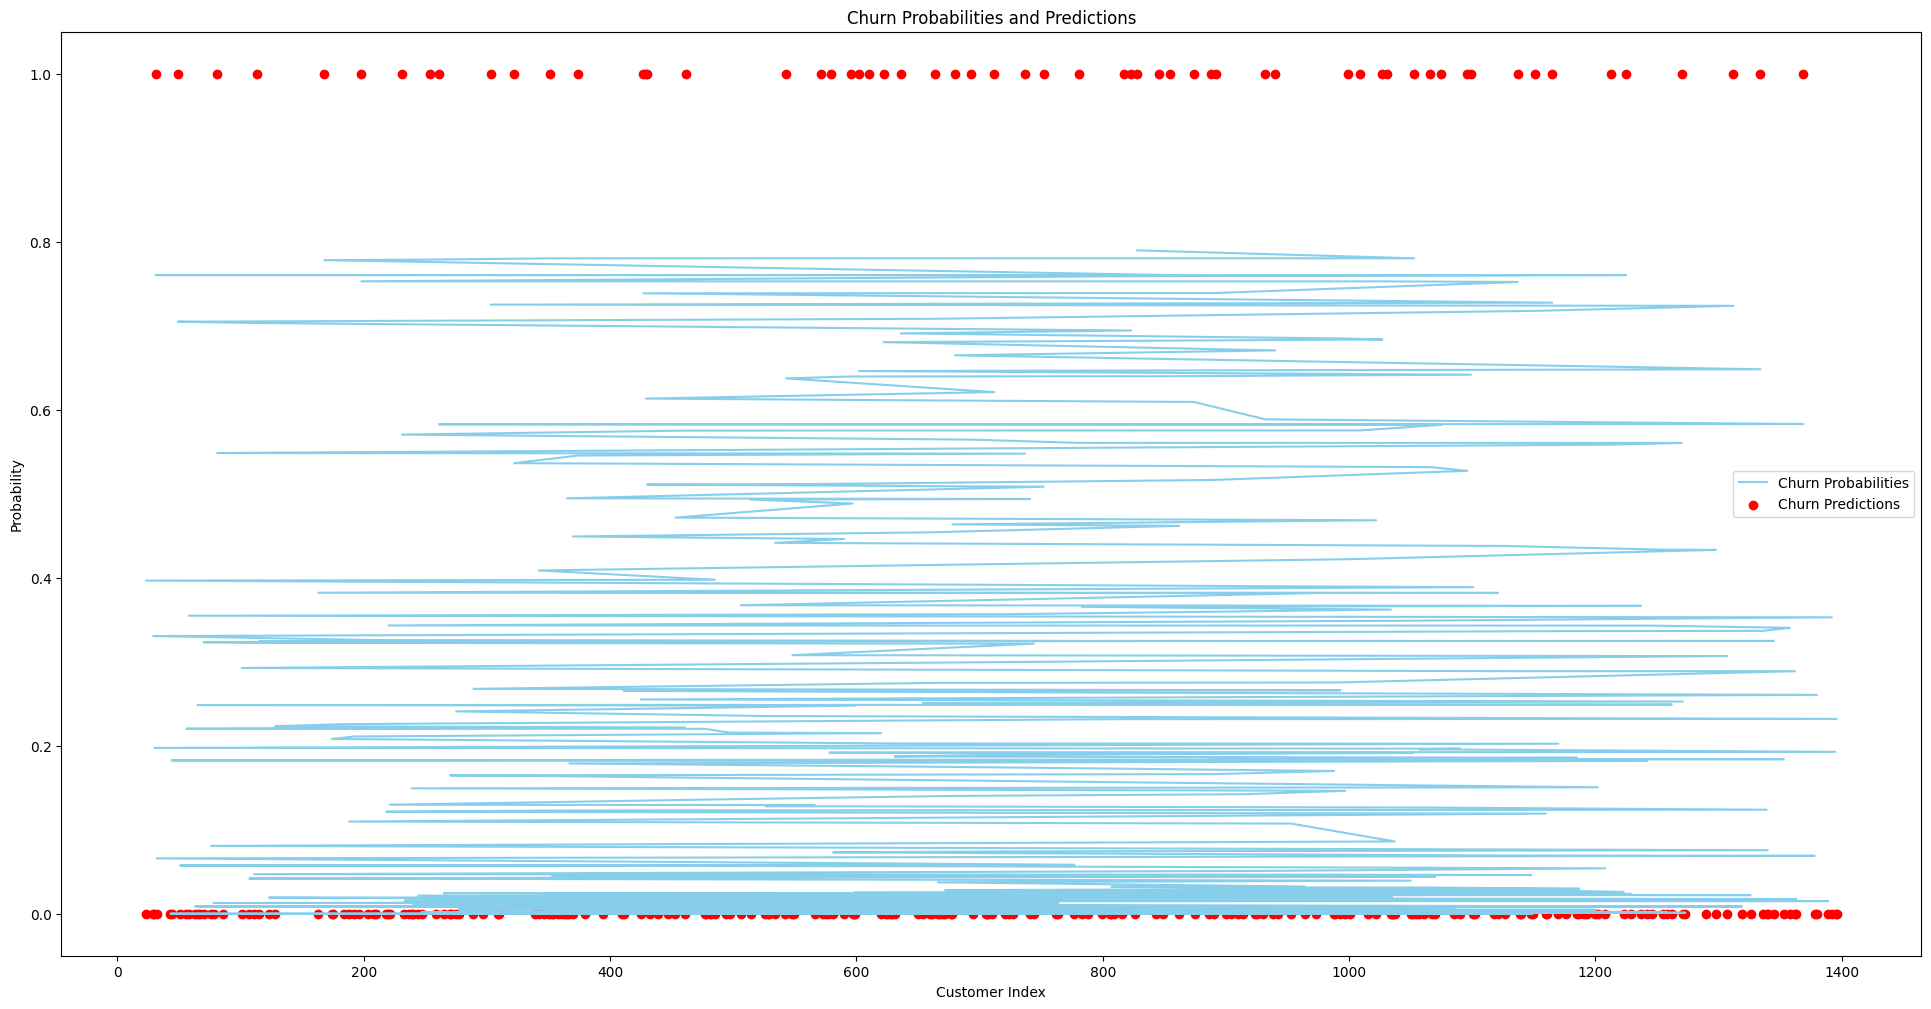

In [ ]:
plt.figure(figsize=(24, 12))

plt.plot(X_test_sorted.index, X_test_sorted['Churn_Probabilities'], label='Churn Probabilities', color='skyblue')
plt.scatter(X_test_sorted.index, X_test_sorted['Churn_Predictions'], label='Churn Predictions', color='red')

plt.title('Churn Probabilities and Predictions')
plt.xlabel('Customer Index')
plt.ylabel('Probability')
plt.legend()
plt.show()

# **Hyperparameter Tuning**

In [ ]:
X = df_normalized.drop('Churn', axis=1)
y = df_normalized['Churn']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of models to experiment with
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Experiment with different models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    print(f"{model_name} Evaluation:")
    print(classification_report(y_test, y_pred))
    print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba)}")
    print("\n")

# Define hyperparameter grids
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga'],
        'l1_ratio': [0.1, 0.5, 0.9]  # Only used for saga and elasticnet
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20, 30, 40],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['gini', 'entropy']
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5],
        'subsample': [0.8, 0.9, 1.0],
        'min_samples_split': [2, 5, 10]
    }
}

# Find the best model with hyperparameter tuning
best_estimators = {}
for model_name, model in models.items():
    print(f"Hyperparameter tuning for {model_name}")
    if model_name == 'Logistic Regression':
        # Modify parameter grid for Logistic Regression
        param_grid = {
            'C': [0.01, 0.1, 1, 10, 100],
            'penalty': ['l1', 'l2', 'elasticnet'],
            'solver': ['liblinear', 'saga'],
            'l1_ratio': [0.1, 0.5, 0.9]  # Only used for saga and elasticnet
        }
    else:
        param_grid = param_grids[model_name]

    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_estimators[model_name] = grid_search.best_estimator_

    y_pred = best_estimators[model_name].predict(X_test)
    y_pred_proba = best_estimators[model_name].predict_proba(X_test)[:, 1]

    print(f"Best {model_name} Model Evaluation:")
    print(classification_report(y_test, y_pred))
    print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba)}")
    print("\n")

# Find the overall best model
best_model = None
best_auc_roc = 0
best_model_name = ""

for model_name, best_estimator in best_estimators.items():
    y_pred = best_estimator.predict(X_test)
    y_pred_proba = best_estimator.predict_proba(X_test)[:, 1]

    auc_roc = roc_auc_score(y_test, y_pred_proba)

    if auc_roc > best_auc_roc:
        best_auc_roc = auc_roc
        best_model = best_estimator
        best_model_name = model_name

print(f"The best model is {best_model_name} with an AUC-ROC score of {best_auc_roc:.2f}")

# Evaluate the best model in detail
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

print(f"Detailed evaluation of the best model ({best_model_name}):")
print(classification_report(y_test, y_pred))
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba)}")

Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       207
           1       0.60      0.48      0.53        75

    accuracy                           0.78       282
   macro avg       0.71      0.68      0.69       282
weighted avg       0.76      0.78      0.77       282

AUC-ROC: 0.7961996779388084


Decision Tree Evaluation:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       207
           1       0.46      0.43      0.44        75

    accuracy                           0.71       282
   macro avg       0.63      0.62      0.62       282
weighted avg       0.71      0.71      0.71       282

AUC-ROC: 0.6215458937198067


Random Forest Evaluation:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       207
           1       0.55      0.48      0.51        75

    accuracy                          

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
75 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/u

Best Logistic Regression Model Evaluation:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       207
           1       0.59      0.48      0.53        75

    accuracy                           0.77       282
   macro avg       0.71      0.68      0.69       282
weighted avg       0.76      0.77      0.77       282

AUC-ROC: 0.7955555555555556


Hyperparameter tuning for Decision Tree
Best Decision Tree Model Evaluation:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       207
           1       0.52      0.47      0.49        75

    accuracy                           0.74       282
   macro avg       0.67      0.66      0.66       282
weighted avg       0.74      0.74      0.74       282

AUC-ROC: 0.6965217391304347


Hyperparameter tuning for Random Forest
Best Random Forest Model Evaluation:
              precision    recall  f1-score   support

           0       0.82      0.87 

KeyboardInterrupt: 